In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [57]:
df_test = pd.read_csv('test.csv')

In [86]:
df_test

,CP_code,MtM,PoE,CS_PoE,Maturity,flg,2018/7/21,2018/7/22,2018/7/23,2018/9/30,...,2019/12/30,2020/12/30,2021/12/30,2022/12/30,2023/12/30,2025/12/30,2027/12/30,2029/12/30,2034/12/30,apply_PoE
0,10001,100987,2.000000e+01,1,2018/9/25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.000000e+01
1,10002,1000974,7.709800e+04,30,2019/3/20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.000000e+01
2,10003,-86897,8.986977e+09,900000,2020/5/20,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.986977e+09
3,10004,-4510973,1.098100e+11,39999,2030/3/30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.999900e+04
4,10005,77688750,9.986066e+09,20,2026/7/4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.986066e+09


In [85]:
df_test['apply_PoE'] = df_test[['flg', 'PoE', 'CS_PoE']].apply(lambda x: x[2] if x[0] == 0 else x[1], axis=1)

In [84]:
df_test[['flg', 'PoE', 'CS_PoE']].apply(lambda x: x[1], axis=1)

0    2.000000e+01
1    7.709800e+04
2    8.986977e+09
3    1.098100e+11
4    9.986066e+09
dtype: float64

In [95]:
df_aggregation_grid = pd.DataFrame(df_test.columns[6:-1])
df_aggregation_grid.head()

,0
0,2018/7/21
1,2018/7/22
2,2018/7/23
3,2018/9/30
4,2018/12/30


In [110]:
for i in range(len(df_aggregation_grid)):
    df_test[df_aggregation_grid[0][i]] = df_test[['Maturity', 'apply_PoE']].apply(lambda x: x[1] if (str_to_dt_obj(x[0]) > str_to_dt_obj(df_aggregation_grid[0][i])) else 0, axis=1)

In [111]:
df_test

,CP_code,MtM,PoE,CS_PoE,Maturity,flg,2018/7/21,2018/7/22,2018/7/23,2018/9/30,...,2019/12/30,2020/12/30,2021/12/30,2022/12/30,2023/12/30,2025/12/30,2027/12/30,2029/12/30,2034/12/30,apply_PoE
0,10001,100987,2.000000e+01,1,2018/9/25,1,2.000000e+01,2.000000e+01,2.000000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0,2.000000e+01
1,10002,1000974,7.709800e+04,30,2019/3/20,0,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0,3.000000e+01
2,10003,-86897,8.986977e+09,900000,2020/5/20,2,8.986977e+09,8.986977e+09,8.986977e+09,8.986977e+09,...,8.986977e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0,8.986977e+09
3,10004,-4510973,1.098100e+11,39999,2030/3/30,0,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04,...,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04,39999.0,39999.0,0,3.999900e+04
4,10005,77688750,9.986066e+09,20,2026/7/4,1,9.986066e+09,9.986066e+09,9.986066e+09,9.986066e+09,...,9.986066e+09,9.986066e+09,9.986066e+09,9.986066e+09,9.986066e+09,9.986066e+09,0.0,0.0,0,9.986066e+09


In [89]:
aggregation_grid = df_test.columns[6:]
len(aggregation_grid)

15

In [60]:
for i in range(6, 6+len(aggregation_grid)):
    df_test[df_test.columns[i]] = 0

In [61]:
pd.to_datetime(df_test['Maturity'])

0   2018-09-25
1   2019-03-20
2   2020-05-20
3   2030-03-30
4   2026-07-04
Name: Maturity, dtype: datetime64[ns]

In [62]:
def str_to_dt_obj(str):
    return datetime.datetime.strptime(str, '%Y/%m/%d')

## 2019/3/26 EAD

In [4]:
df_ead = pd.read_csv('EAD.csv')
df_ead

,GCIF,EAD_SACCR,CEM_EAD,RWA_SACCR,CEM_RWA,kbn,gyousyu
0,873,5.537346e+07,2.061419e+06,5.505531e+07,1.305577e+06,customer,telecom
1,786,8.083901e+06,1.614773e+05,2.311649e+06,9.002309e+04,bank,finance
2,986,1.916497e+07,1.884677e+06,1.107456e+07,1.106932e+06,bank,finance
3,123,6.351879e+07,7.246506e+06,6.067554e+07,6.063667e+06,customer,industry
4,467,7.691376e+07,5.834574e+06,8.431096e+06,4.594163e+06,customer,industry
5,486,9.784517e+07,6.429847e+06,8.402405e+07,2.521156e+06,bank,finance
6,187,3.959633e+07,2.057229e+06,1.310034e+07,1.167193e+06,customer,consumer service
7,764,7.830127e+06,2.788185e+06,2.166783e+06,9.915404e+05,customer,consumer service
8,687,1.758502e+07,5.778570e+06,7.531977e+06,3.815376e+06,ccp,finance
9,918,1.559255e+07,4.195526e+06,8.824461e+06,2.175445e+06,ccp,finance


In [48]:
def sort_values(g, str_sort):
    return g.sort_values(by=str_sort, ascending=False)

In [49]:
df_ead.groupby('kbn').apply(sort_values, 'EAD_SACCR')

GCIF     EAD_SACCR       CEM_EAD     RWA_SACCR       CEM_RWA  \
kbn                                                                         
bank     5    486  9.784517e+07  6.429847e+06  8.402405e+07  2.521156e+06   
         12   389  5.415766e+07  3.399775e+06  4.067523e+07  1.430213e+06   
         2    986  1.916497e+07  1.884677e+06  1.107456e+07  1.106932e+06   
         1    786  8.083901e+06  1.614773e+05  2.311649e+06  9.002309e+04   
ccp      11   128  4.835322e+07  8.699228e+06  4.366466e+07  8.501567e+06   
         8    687  1.758502e+07  5.778570e+06  7.531977e+06  3.815376e+06   
         9    918  1.559255e+07  4.195526e+06  8.824461e+06  2.175445e+06   
customer 4    467  7.691376e+07  5.834574e+06  8.431096e+06  4.594163e+06   
         3    123  6.351879e+07  7.246506e+06  6.067554e+07  6.063667e+06   
         0    873  5.537346e+07  2.061419e+06  5.505531e+07  1.305577e+06   
         6    187  3.959633e+07  2.057229e+06  1.310034e+07  1.167193e+06   
         10   864  1.683060e+07  2.906436e+06  1.963227e+06  2.078169e+06   
         7    764  7.830127e+06  2.788185e+06  2.166783e+06  9.915404e+05   

                  kbn           gyousyu  
kbn                                      
bank     5       bank           finance  
         12      bank           finance  
         2       bank           finance  
         1       bank           finance  
ccp      11       ccp           finance  
         8        ccp           finance  
         9        ccp           finance  
customer 4   customer          industry  
         3   customer          industry  
         0   customer           telecom  
         6   customer  consumer service  
         10  customer  consumer service  
         7   customer  consumer service

In [50]:
df_ead.groupby(['kbn', 'gyousyu']).apply(sort_values, 'CEM_EAD')

GCIF     EAD_SACCR       CEM_EAD     RWA_SACCR  \
kbn      gyousyu                                                               
bank     finance          5    486  9.784517e+07  6.429847e+06  8.402405e+07   
                          12   389  5.415766e+07  3.399775e+06  4.067523e+07   
                          2    986  1.916497e+07  1.884677e+06  1.107456e+07   
                          1    786  8.083901e+06  1.614773e+05  2.311649e+06   
ccp      finance          11   128  4.835322e+07  8.699228e+06  4.366466e+07   
                          8    687  1.758502e+07  5.778570e+06  7.531977e+06   
                          9    918  1.559255e+07  4.195526e+06  8.824461e+06   
customer consumer service 10   864  1.683060e+07  2.906436e+06  1.963227e+06   
                          7    764  7.830127e+06  2.788185e+06  2.166783e+06   
                          6    187  3.959633e+07  2.057229e+06  1.310034e+07   
         industry         3    123  6.351879e+07  7.246506e+06  6.067554e+07   
                          4    467  7.691376e+07  5.834574e+06  8.431096e+06   
         telecom          0    873  5.537346e+07  2.061419e+06  5.505531e+07   

                                   CEM_RWA       kbn           gyousyu  
kbn      gyousyu                                                        
bank     finance          5   2.521156e+06      bank           finance  
                          12  1.430213e+06      bank           finance  
                          2   1.106932e+06      bank           finance  
                          1   9.002309e+04      bank           finance  
ccp      finance          11  8.501567e+06       ccp           finance  
                          8   3.815376e+06       ccp           finance  
                          9   2.175445e+06       ccp           finance  
customer consumer service 10  2.078169e+06  customer  consumer service  
                          7   9.915404e+05  customer  consumer service  
                          6   1.167193e+06  customer  consumer service  
         industry         3   6.063667e+06  customer          industry  
                          4   4.594163e+06  customer          industry  
         telecom          0   1.305577e+06  customer           telecom

In [60]:
df_agg = df_ead.groupby(['kbn', 'gyousyu'], as_index=False).sum()
df_agg

,kbn,gyousyu,GCIF,EAD_SACCR,CEM_EAD,RWA_SACCR,CEM_RWA
0,bank,finance,2647,1.792517e+08,1.187578e+07,1.380855e+08,5.148323e+06
1,ccp,finance,1733,8.153079e+07,1.867332e+07,6.002109e+07,1.449239e+07
2,customer,consumer service,1815,6.425706e+07,7.751850e+06,1.723035e+07,4.236902e+06
3,customer,industry,590,1.404326e+08,1.308108e+07,6.910663e+07,1.065783e+07
4,customer,telecom,873,5.537346e+07,2.061419e+06,5.505531e+07,1.305577e+06


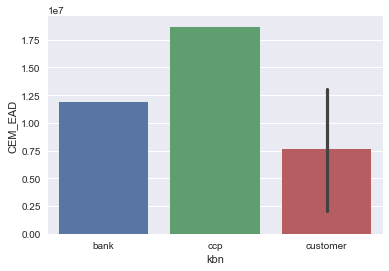

In [96]:
sns.barplot(data=df_agg, x='kbn', y='CEM_EAD')

In [31]:
df_sum = df_ead.groupby('kbn', as_index=False).sum()
df_sum

,kbn,GCIF,EAD_SACCR,CEM_EAD,RWA_SACCR,CEM_RWA
0,bank,2647,1.792517e+08,1.187578e+07,1.380855e+08,5.148323e+06
1,ccp,1733,8.153079e+07,1.867332e+07,6.002109e+07,1.449239e+07
2,customer,3278,2.600631e+08,2.289435e+07,1.413923e+08,1.620031e+07


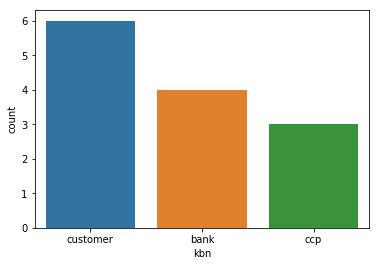

In [11]:
sns.countplot('kbn', data=df_ead)

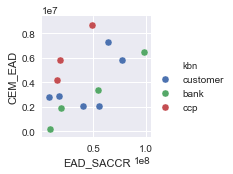

In [19]:
sns.set(style='darkgrid')
sns.pairplot(data=df_ead, x_vars='EAD_SACCR', y_vars='CEM_EAD', hue='kbn')

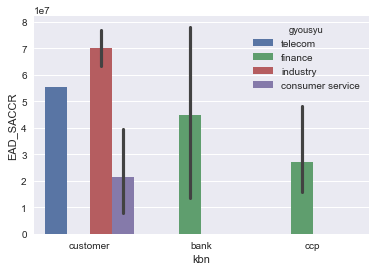

In [32]:
sns.barplot(data=df_ead, x='kbn', y='EAD_SACCR', hue='gyousyu')

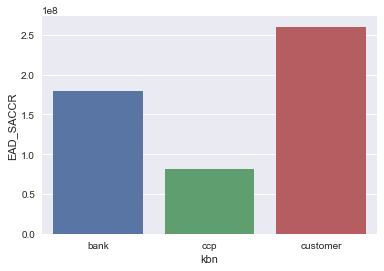

In [35]:
sns.barplot(data=df_sum, x='kbn', y='EAD_SACCR')

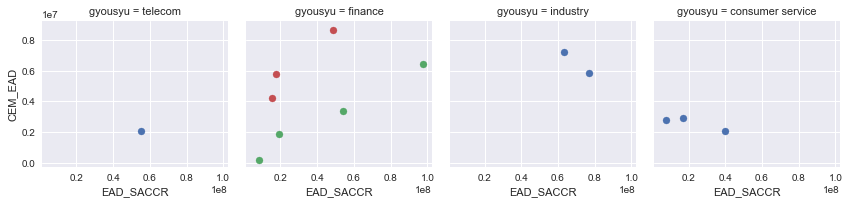

In [42]:
g = sns.FacetGrid(df_ead, col='gyousyu', hue='kbn')
g.map(plt.scatter, 'EAD_SACCR', 'CEM_EAD')

In [106]:
mapping = {'bank': 1, 'ccp':2, 'customer': 3}
df_agg['kbn_num'] = df_agg['kbn'].apply(lambda x: mapping[x])
df_agg

,kbn,gyousyu,GCIF,EAD_SACCR,CEM_EAD,RWA_SACCR,CEM_RWA,kbn_num
0,bank,finance,2647,1.792517e+08,1.187578e+07,1.380855e+08,5.148323e+06,1
1,ccp,finance,1733,8.153079e+07,1.867332e+07,6.002109e+07,1.449239e+07,2
2,customer,consumer service,1815,6.425706e+07,7.751850e+06,1.723035e+07,4.236902e+06,3
3,customer,industry,590,1.404326e+08,1.308108e+07,6.910663e+07,1.065783e+07,3
4,customer,telecom,873,5.537346e+07,2.061419e+06,5.505531e+07,1.305577e+06,3


([<matplotlib.axis.XTick at 0x1a1c9b54a8>,
 <a list of 3 Text xticklabel objects>)

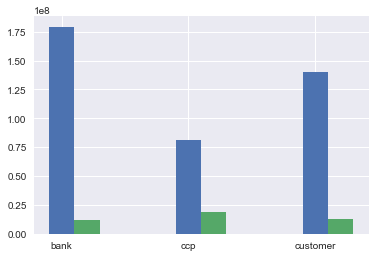

In [155]:
#fig = plt.figure(figsize=(6,4))
#ax = fig.add_subplot(1,1,1)
width= 0.2
label = ['bank', 'ccp', 'customer']
plt.bar(df_agg['kbn_num'], df_agg['EAD_SACCR'], width=width, align='center')
plt.bar(df_agg['kbn_num']+width, df_agg['CEM_EAD'], width=width, align='center')

plt.xticks(df_agg['kbn_num'], label)

In [149]:
label

['bank', 'ccp', 'customer']

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

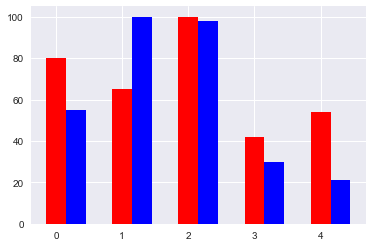

In [153]:
import matplotlib.pyplot as plt
import numpy as np
 
height1 = [80, 65, 100, 42, 54]  # 点数1
height2 = [55, 100, 98, 30, 21]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['Japanese', 'Math', 'Science', 'Social', 'English']
 
width = 0.3
 
plt.bar(left, height1, color='r', width=width, align='center')
plt.bar(left+width, height2, color='b', width=width, align='center')
 
plt.xticks(left + width/2, labels)
plt.show()